In [2]:
!for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done
!for ((y=0; y<=1; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done
!for ((y=2; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done
!for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

--2016-12-14 14:12:01--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
           => “zbp93totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp93totals.zip ... done.
==> PASV ... done.    ==> RETR zbp93totals.zip ... 
No such file “zbp93totals.zip”.

--2016-12-14 14:12:02--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp94totals.zip
           => “zbp94totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp94totals.zip ... 611524
==> PASV ... don

In [286]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import os
import sys
import geopandas
from fiona.crs import from_epsg
import pysal as ps
import seaborn as sns
import json
import pylab as pl
import pandas as pd
import re

#from PIL import Image
import zipfile
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from IPython.display import Image
s = json.load( open(os.getenv('PUIDATA')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)

import os
import sys
print (os.getenv("PUIDATA"))

/home/cusp/cx495/PUIdata


In [287]:
filename = "nyc-zip-code-tabulation-areas-polygons.geojson"
os.system("mv " + filename + " " + os.getenv("PUIDATA"))
NYCZipCodes = geopandas.read_file(os.getenv("PUIDATA") + "/" + filename)
NYCZip = NYCZipCodes[['geometry', 'postalCode']]
NYCZip.rename(columns={'postalCode':'ZIP'}, inplace=True)
NYCZip['ZIP'] = NYCZip['ZIP'].astype(str)
NYCZip.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,geometry,ZIP
0,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [288]:
os.system("mkdir -p " + os.getenv("PUIDATA") + "/CensusBusinessData")
os.system("mv " + "*.zip " + os.getenv("PUIDATA") + "/CensusBusinessData")

256

In [289]:
path = os.getenv("PUIDATA") + "/CensusBusinessData/"

In [290]:
mydata = []

In [291]:
year1 = ['94', '95', '96', '97']
for i in year1:
    filename = 'zbp' + i + 'totals.zip'
    zf = zipfile.ZipFile(path + filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')),
        index_col = [0],
        usecols = ['zip','est'])
    df.rename(columns = {'est': i}, inplace=True)
    mydata.append(df)

In [292]:
year2 = ['98', '99', '00', '01', '02']
for i in year2:
    filename = 'zbp' + i + 'totals.zip'
    zf = zipfile.ZipFile(path + filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')),
        index_col = [0],
        usecols = ['ZIP','EST'])
    df.rename(columns = {'EST': i}, inplace=True)
    mydata.append(df)

In [293]:
year3 = ['03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']
for i in year3:
    filename = 'zbp' + i + 'totals.zip'
    zf = zipfile.ZipFile(path + filename)
    df = pd.read_csv(zf.open(filename.replace('.zip','.txt')),
        index_col = [0],
        usecols = ['zip','est'])
    df.rename(columns = {'est': i}, inplace=True)
    mydata.append(df)

In [294]:
bizData = mydata[0]
for i in np.arange(len(mydata) -1) + 1:
    bizData = pd.merge(bizData, mydata[i], left_index=True, right_index=True, how='inner')
bizData.head()

,94,95,96,97,98,99,00,01,02,03,...,05,06,07,08,09,10,11,12,13,14
1001,439,439,433,457,444,469,493,490,490,505,...,509,509,503,477,458,448,436,453,439,458
1002,450,467,487,500,490,558,563,587,566,586,...,589,582,596,584,571,570,558,572,572,560
1003,10,10,13,15,14,13,13,13,15,16,...,12,12,16,17,16,16,16,15,15,18
1004,47,48,47,41,31,35,48,37,23,21,...,31,30,20,18,18,21,19,16,16,13
1005,92,95,101,104,95,82,86,90,94,93,...,94,98,106,97,87,96,91,94,97,97


In [295]:
df_sd = bizData.std(axis = 1)
df_mean = bizData.mean(axis = 1)

In [296]:
for cols in bizData.columns:
    bizData[cols] = (bizData[cols] - df_mean) / df_sd

In [297]:
bizData['ZIP'] = bizData.index.astype(str)
bizData.shape

(35885, 22)

In [298]:
bizData.head()

,94,95,96,97,98,99,00,01,02,03,...,06,07,08,09,10,11,12,13,14,ZIP
1001,-1.098084,-1.098084,-1.317700,-0.439233,-0.915070,0.000000,0.878467,0.768659,0.768659,1.317700,...,1.464112,1.244495,0.292822,-0.402631,-0.768659,-1.207892,-0.585645,-1.098084,-0.402631,1001
1002,-2.310615,-1.925513,-1.472451,-1.177961,-1.404492,0.135919,0.249184,0.792858,0.317143,0.770205,...,0.679593,0.996736,0.724899,0.430409,0.407756,0.135919,0.453062,0.453062,0.181225,1002
1003,-1.995129,-1.995129,-0.598539,0.332521,-0.133009,-0.598539,-0.598539,-0.598539,0.332521,0.798052,...,-1.064069,0.798052,1.263582,0.798052,0.798052,0.798052,0.332521,0.332521,1.729112,1003
1004,1.417467,1.499244,1.417467,0.926806,0.109036,0.436144,1.499244,0.599698,-0.545180,-0.708734,...,0.027259,-0.790511,-0.954065,-0.954065,-0.708734,-0.872288,-1.117619,-1.117619,-1.362949,1004
1005,-0.457747,0.076291,1.144368,1.678406,0.076291,-2.237875,-1.525824,-0.813773,-0.101722,-0.279734,...,0.610330,2.034432,0.432317,-1.347811,0.254304,-0.635760,-0.101722,0.432317,0.432317,1005


In [299]:
zipbizdata = pd.merge(bizData, NYCZip, how='inner', on=['ZIP'])
zipbizdata.head()

,94,95,96,97,98,99,00,01,02,03,...,07,08,09,10,11,12,13,14,ZIP,geometry
0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,10001,POLYGON ((-74.00827017711134 40.75258714368449...
1,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,10002,POLYGON ((-73.97441674489379 40.73642441865476...
2,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,10003,POLYGON ((-73.97986374196766 40.73497446573838...
3,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,10004,"POLYGON ((-74.00596661578348 40.7043243225291,..."
4,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,10004,POLYGON ((-74.04166368343016 40.69644987183209...


In [300]:
df_kmeans = pd.DataFrame({"zip":zipbizdata["ZIP"], "label":Kcluster.labels_})
df_ac= pd.DataFrame({"zip":zipbizdata["ZIP"], "label":AC.labels_})

In [301]:
year=[1994]
for i in range(1,21):
    t=1994+i
    year.append(t)

In [302]:
df = zipbizdata
df.drop(['ZIP', 'geometry'], axis=1, inplace=True)
df.columns = year
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986
1,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077
2,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833
3,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945
4,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945


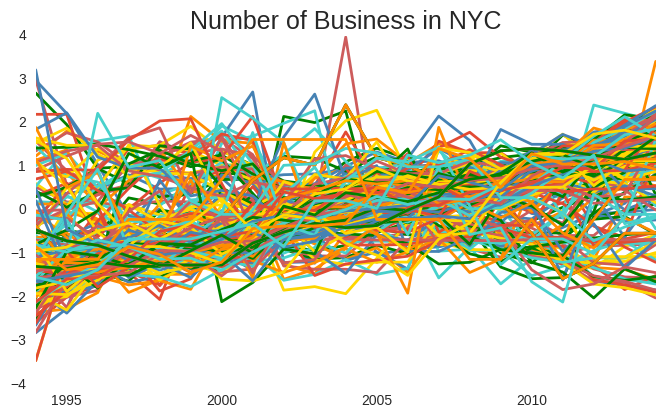

In [303]:
pl.figure(figsize=(8,4.5))
pl.xlim(1994,2014)
pl.title("Number of Business in NYC", fontsize = 18)
for i in range(len(df)):
    pl.plot(df.iloc[i])

### Figure 1: Number od Business in NYC by Year

In [304]:
col= [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    ]

for 2 clusters, the number of lines in each clusters is [193, 50]


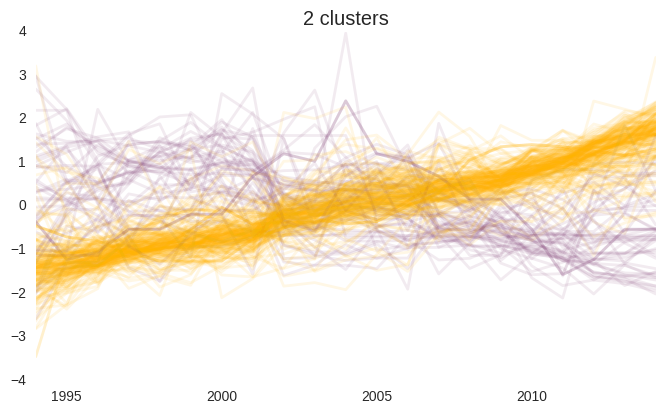

In [305]:
num_cluster = 2
clf=sklearn.cluster.KMeans(n_clusters = num_cluster)
clf.fit(df.values)
labels=clf.labels_
centers = clf.cluster_centers_
pl.figure(figsize=(8,4.5))
pl.xlim(1994,2014)
pl.title('%d clusters'%(num_cluster))
for i in range(len(df)):
        pl.plot(df.iloc[i],c=col[labels[i]], alpha=0.1)
mum_intercluster=[]
for j in range(num_cluster):
    #pl.plot(range(1994,2014),centers[j],'-',linewidth=5)
    pl.plot(centers[j],'-',c=col[j],linewidth=5)
    mum_intercluster.append(len([i for i in labels if i == j]))
        
print "for %d clusters, the number of lines in each clusters is"%(num_cluster), mum_intercluster 

### Figure 2: K-means with 2 clusters

for 3 clusters, the number of lines in each clusters is [187, 25, 31]


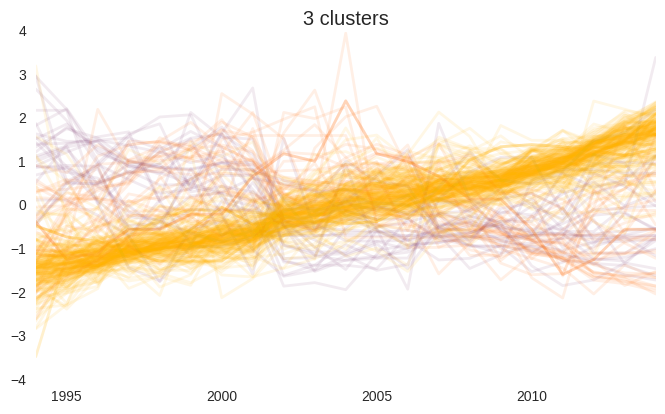

In [306]:
num_cluster = 3
clf=sklearn.cluster.KMeans(n_clusters = num_cluster)
clf.fit(df.values)
labels=clf.labels_
centers = clf.cluster_centers_
pl.figure(figsize=(8,4.5))
pl.xlim(1994,2014)
pl.title('%d clusters'%(num_cluster))
for i in range(len(df)):
        pl.plot(df.iloc[i],c=col[labels[i]], alpha=0.1)
mum_intercluster=[]
for j in range(num_cluster):
    #pl.plot(range(1994,2014),centers[j],'-',linewidth=5)
    pl.plot(centers[j],'-',c=col[j],linewidth=5)
    mum_intercluster.append(len([i for i in labels if i == j]))
        
print "for %d clusters, the number of lines in each clusters is"%(num_cluster), mum_intercluster 

### Figure 3: K_means with 3 clusters

for 4 clusters, the number of lines in each clusters is [16, 32, 17, 178]


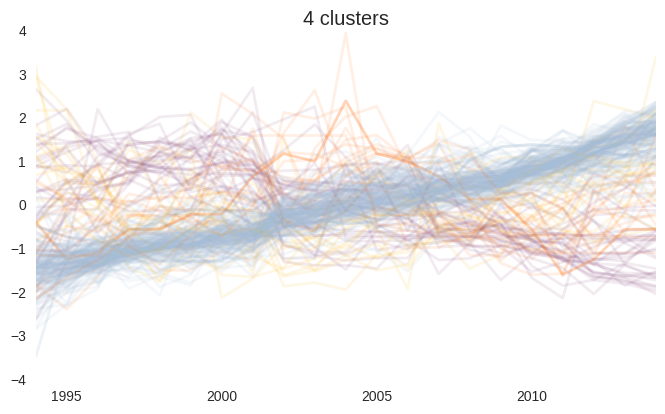

In [307]:
num_cluster = 4
clf=sklearn.cluster.KMeans(n_clusters = num_cluster)
clf.fit(df.values)
labels=clf.labels_
centers = clf.cluster_centers_
pl.figure(figsize=(8,4.5))
pl.xlim(1994,2014)
pl.title('%d clusters'%(num_cluster))
for i in range(len(df)):
        pl.plot(df.iloc[i],c=col[labels[i]], alpha=0.1)
mum_intercluster=[]
for j in range(num_cluster):
    #pl.plot(range(1994,2014),centers[j],'-',linewidth=5)
    pl.plot(centers[j],'-',c=col[j],linewidth=5)
    mum_intercluster.append(len([i for i in labels if i == j]))
        
print "for %d clusters, the number of lines in each clusters is"%(num_cluster), mum_intercluster 

### Figure 4: K-means with 4 clusters

for 5 clusters, the number of lines in each clusters is [152, 28, 30, 19, 14]


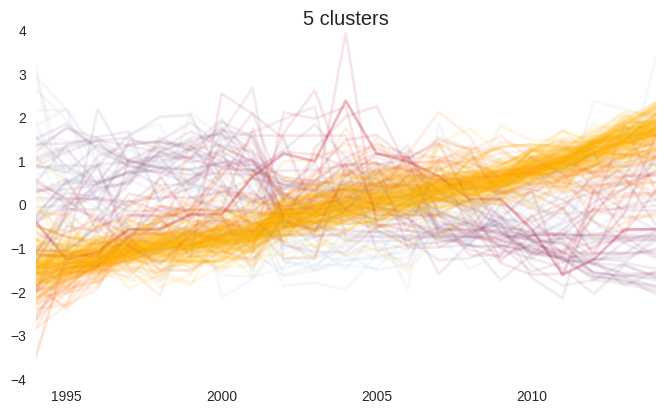

In [308]:
num_cluster = 5
clf=sklearn.cluster.KMeans(n_clusters = num_cluster)
clf.fit(df.values)
labels=clf.labels_
centers = clf.cluster_centers_
pl.figure(figsize=(8,4.5))
pl.xlim(1994,2014)
pl.title('%d clusters'%(num_cluster))
for i in range(len(df)):
        pl.plot(df.iloc[i],c=col[labels[i]], alpha=0.1)
mum_intercluster=[]
for j in range(num_cluster):
    #pl.plot(range(1994,2014),centers[j],'-',linewidth=5)
    pl.plot(centers[j],'-',c=col[j],linewidth=5)
    mum_intercluster.append(len([i for i in labels if i == j]))
        
print "for %d clusters, the number of lines in each clusters is"%(num_cluster), mum_intercluster

### Figure 5: K-means with 5 clusters

## Agglomerative Clustering

In [309]:
def Aggcluster(num_cluster):
    
    #cluster
    clf=AgglomerativeClustering(n_clusters = num_cluster)
    clf.fit(df.values)
    labels=clf.labels_
    
    
    #plot
    pl.figure(figsize=(8,4.5))
    pl.xlim(1994,2013)
    pl.title('Agglomerative Clustering with %d Clusters'%(num_cluster))
    
    for i in range(len(df)):
        pl.plot(df.iloc[i], c=col[labels[i]], alpha=0.5)
        
    
    mum_intercluster=[]
    for j in range(num_cluster):
        mum_intercluster.append(len([i for i in labels if i == j]))
        
    print "for %d clusters, the number of lines in each clusters is"%(num_cluster), mum_intercluster

for 2 clusters, the number of lines in each clusters is [195, 48]
for 3 clusters, the number of lines in each clusters is [48, 180, 15]
for 4 clusters, the number of lines in each clusters is [180, 31, 15, 17]
for 5 clusters, the number of lines in each clusters is [31, 17, 15, 162, 18]


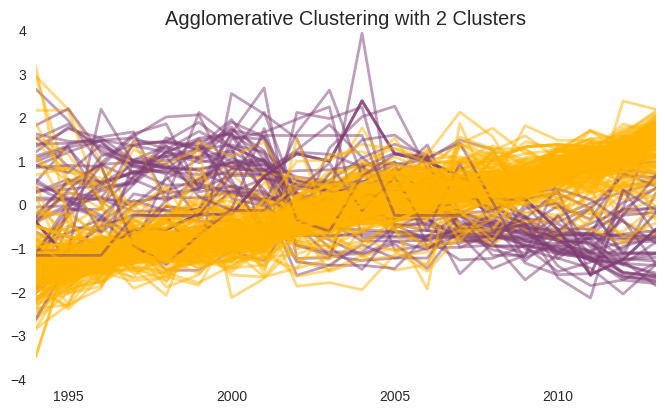

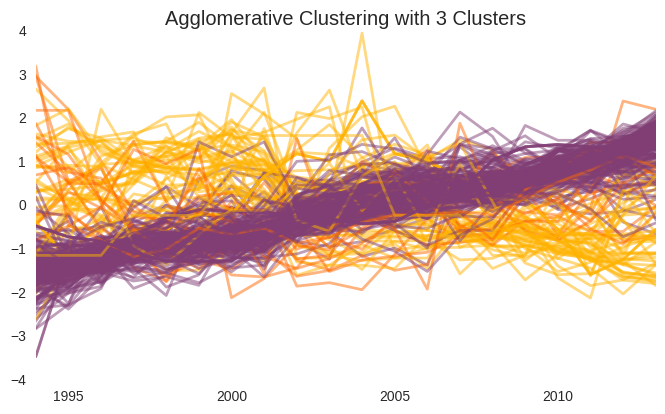

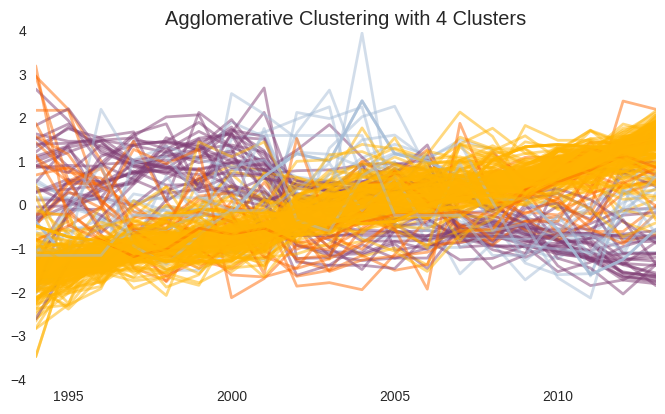

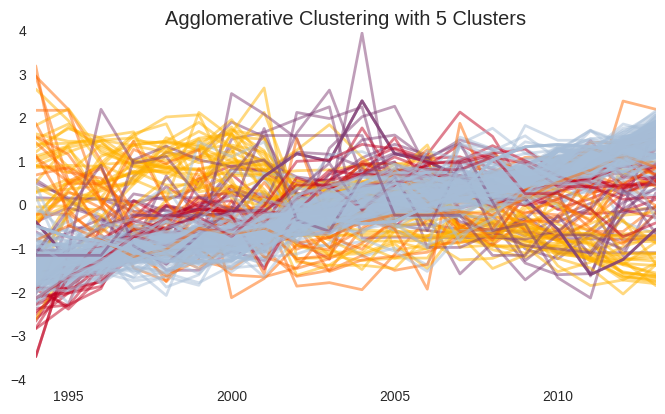

In [310]:
for i in range(2,6):
    Aggcluster(i)

In [311]:
Kcluster = KMeans(n_clusters=3).fit(df)
AC = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(df.iloc[:,:21])

In [312]:
Kcluster.labels_.shape

(243,)

In [313]:
zipbizdata.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986
1,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077
2,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833
3,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945
4,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945


In [315]:
NYCZipCodes.rename(columns={"postalCode":"zip"}, inplace=1)

In [316]:
NYCZipCodes["zip"] = pd.to_numeric(NYCZipCodes["zip"])

In [317]:
finaldf_kmeans= pd.merge(NYCZipCodes, df_kmeans, left_index=True, right_index=True, how='inner', on=['zip'])
finaldf_kmeans.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,zip,label
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,0
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,0
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,0
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,0
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,0


In [318]:
finaldf_ac= pd.merge(NYCZipCodes, df_ac, left_index=True, right_index=True, how='inner', on=['zip'])
finaldf_ac.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,zip,label
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,1
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,1
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,1


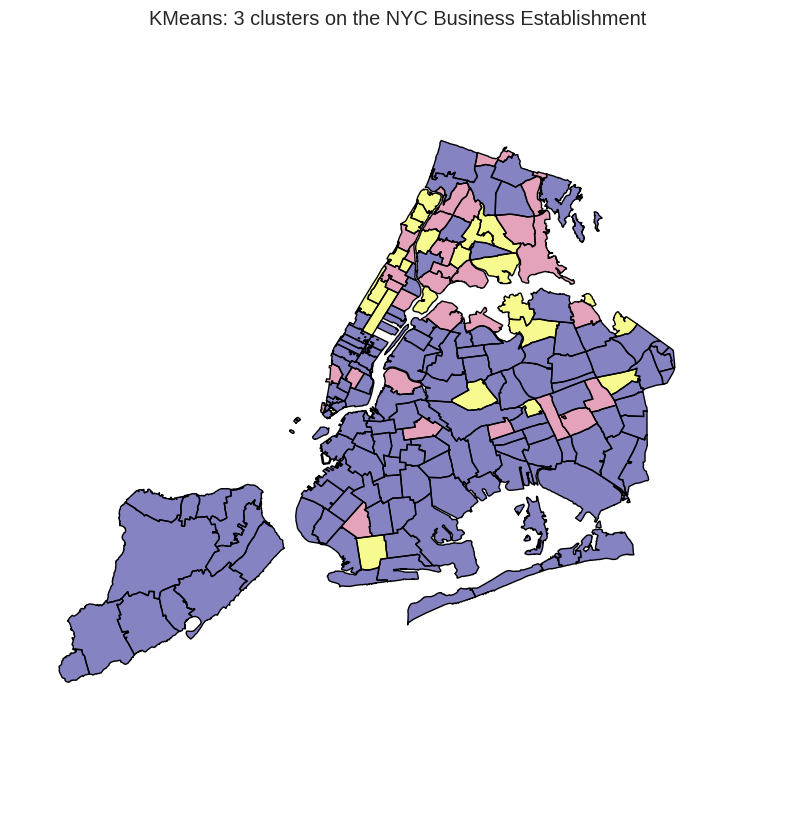

In [319]:
f, ax = plt.subplots(figsize=(10,10))
finaldf_kmeans.plot(column="label", cmap="plasma", figsize=(15,10), ax=ax)
ax.set_title("KMeans: 3 clusters on the NYC Business Establishment")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_axis_bgcolor('white') 

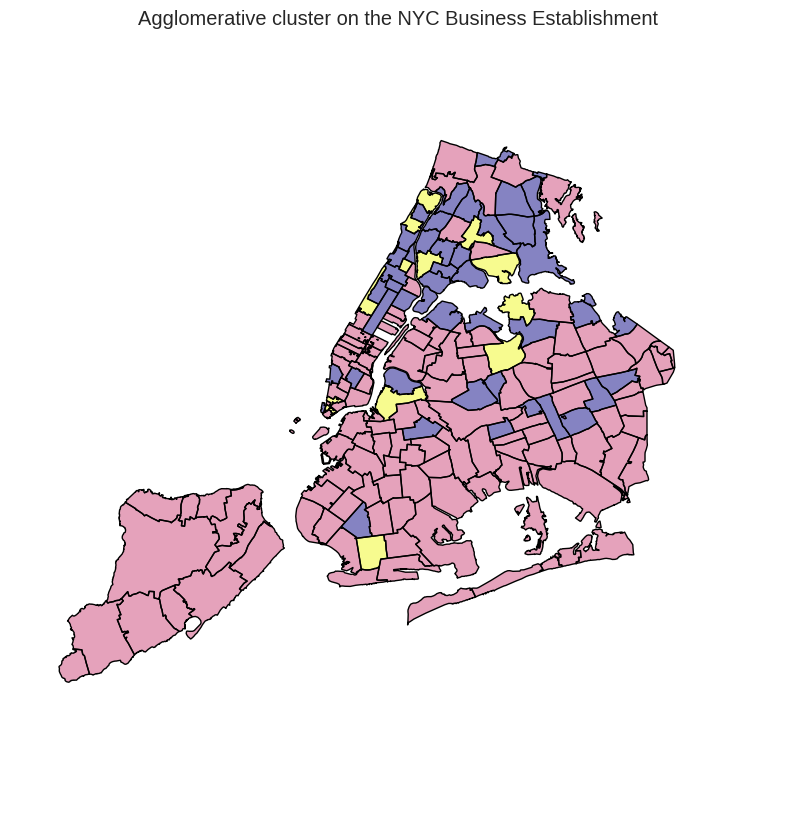

In [320]:
f, ax = plt.subplots(figsize=(10,10))
finaldf_ac.plot(column="label", cmap="plasma", figsize=(15,10), ax=ax)
ax.set_title("Agglomerative cluster on the NYC Business Establishment")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_axis_bgcolor('white') 